# Produce a surf report

A `pysurfline.SurfReport` objects inherit from a simple `pysurfline.SpotForecast` object and features additional reporting functionalities, such as plotting methods and easily readable outputs.

In [95]:
%load_ext autoreload
%autoreload 2

from pysurfline import SpotForecast
from pysurfline import SurfReport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


List of known spot id

| Spot Id | Name |
|---|---|
| 5842041f4e65fad6a7708890 | Pipeline (USA)|
| 584204204e65fad6a7709b09 | Varazze (ITA)|
| 5842041f4e65fad6a7708b4b | Uluwatu (IDN)
| 5842041f4e65fad6a7708c8e | La Graviere (FRA)|

Initializing a `SurfReport` objects does nothing else than calling a `SpotForecast` object with the specified `params` for specifying the desired response by the Surfline API. 

In [96]:
params = {
    "spotId": "5842041f4e65fad6a7708890",
    "days": 3,
    "intervalHours": 3,
}
report = SurfReport(params)
report.api_log


['ForecastGetter(Type:wave, Status:200)',
 'ForecastGetter(Type:wind, Status:200)',
 'ForecastGetter(Type:tides, Status:200)',
 'ForecastGetter(Type:weather, Status:200)']

This object has the `df` attribute to easily inspect the hourly data fetched from the Surfline servers.

In [97]:
report.df.head()

,utcOffset,surf_min,surf_max,surf_optimalScore,swells,utcOffset,speed,direction,directionType,gust,optimalScore,utcOffset,temperature,condition
timestamp,,,,,,,,,,,,,,
2022-02-14 10:00:00,-10,0.789106,1.198612,0,"[{'height': 0.83656, 'period': 6, 'direction':...",-10,16.19458,31.64920,Cross-shore,18.00000,0,-10,21.47415,NIGHT_BRIEF_SHOWERS_POSSIBLE
2022-02-14 13:00:00,-10,0.858518,1.227435,0,"[{'height': 0.92111, 'period': 7, 'direction':...",-10,18.86230,48.06489,Cross-shore,19.80010,0,-10,21.43503,NIGHT_CLEAR
2022-02-14 16:00:00,-10,0.917929,1.236259,0,"[{'height': 1.08641, 'period': 8, 'direction':...",-10,18.07010,61.51265,Cross-shore,20.16000,0,-10,21.26218,NIGHT_CLEAR
2022-02-14 19:00:00,-10,1.014867,1.329267,0,"[{'height': 1.47381, 'period': 9, 'direction':...",-10,20.21768,75.86896,Offshore,21.67319,0,-10,21.98868,CLEAR
2022-02-14 22:00:00,-10,1.250567,1.444367,0,"[{'height': 1.70335, 'period': 10, 'direction'...",-10,18.27161,79.89386,Offshore,18.36023,0,-10,22.47440,CLEAR


Moreover, a simplified version of the dataframe is available with the `surf` attribute. This represents the surf data that is actually plotted.

In [98]:
report.surf.head()

,surf_min,surf_max,speed,directionType,direction
timestamp,,,,,
2022-02-14 10:00:00,0.789106,1.198612,16.19458,Cross-shore,31.64920
2022-02-14 13:00:00,0.858518,1.227435,18.86230,Cross-shore,48.06489
2022-02-14 16:00:00,0.917929,1.236259,18.07010,Cross-shore,61.51265
2022-02-14 19:00:00,1.014867,1.329267,20.21768,Offshore,75.86896
2022-02-14 22:00:00,1.250567,1.444367,18.27161,Offshore,79.89386


Lets then call the `plot()` method, that returns a `matplotlib` figure representing the minimum and maximum surf size that is forecasted for the spot.

Additionally, the daylight hours are shown in the plot, with darkgrey representing night and lightgrey representing dusk and dawn.

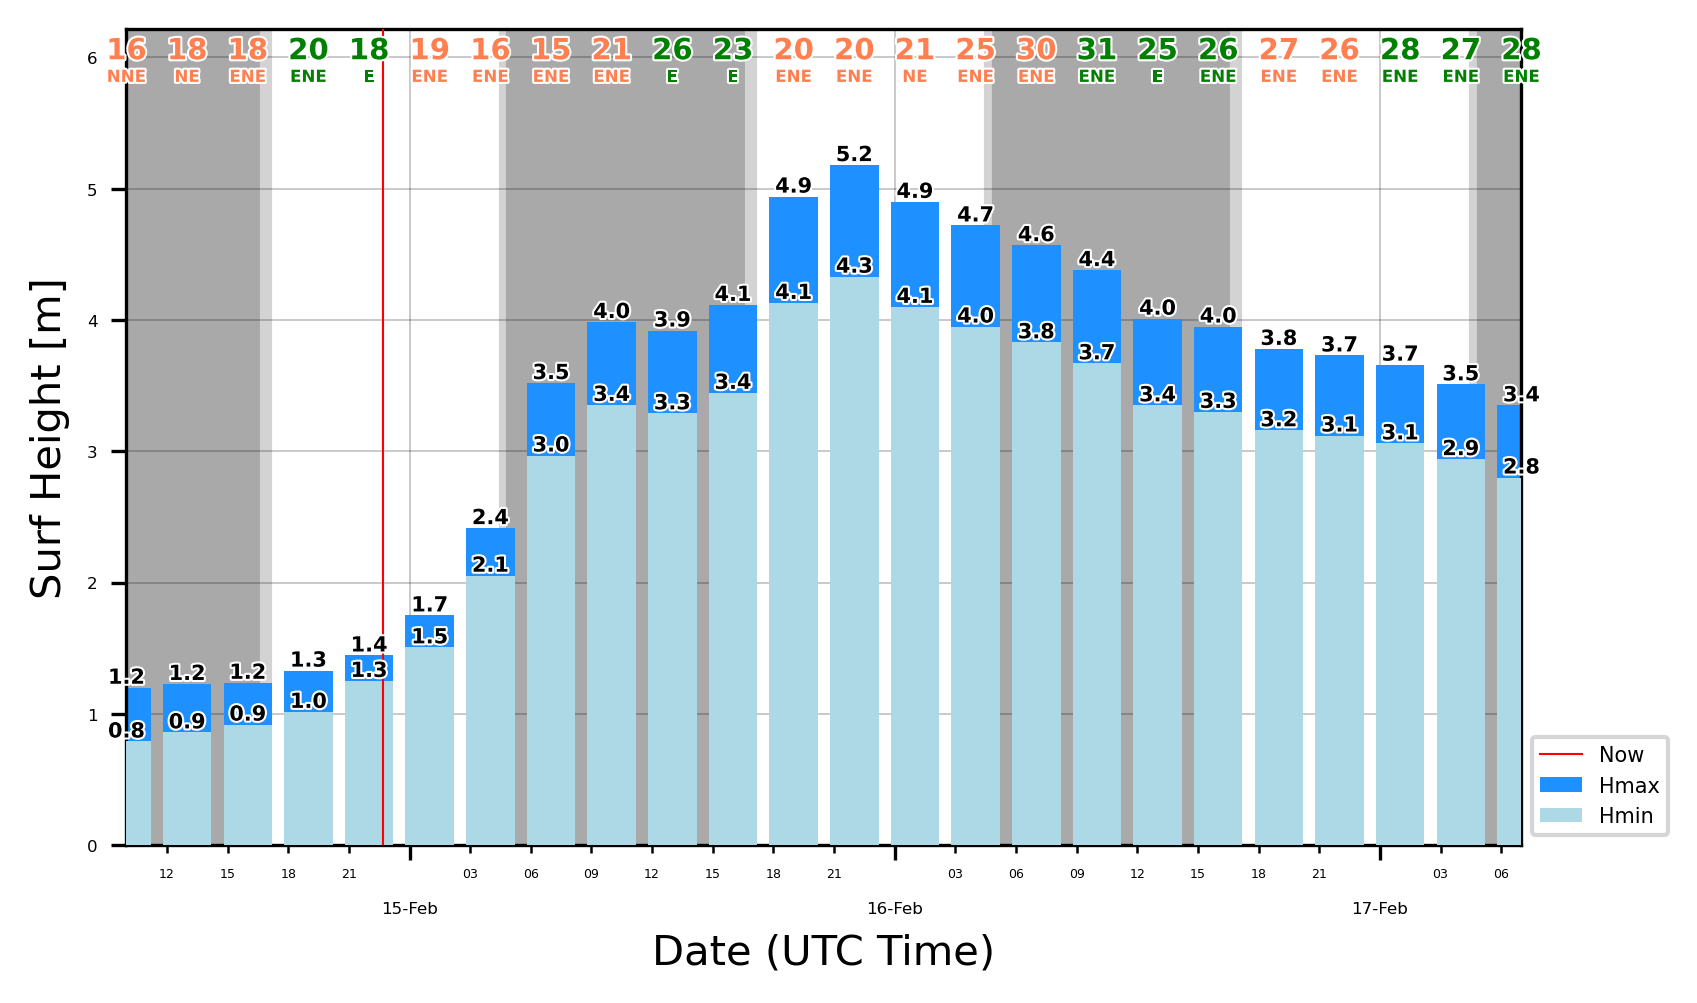

In [103]:
f=report.plot()
f.savefig("../images/surfreport_pipeline.jpeg")